# Import Libraries

In [1]:
import pytz
from datetime import datetime, timedelta
import sys

In [4]:
print(sys.path)

['C:\\Users\\DavidMG\\Desktop\\gym_MT5\\gym-mtsim\\notebooks', 'C:\\Users\\DavidMG\\.virtualenvs\\gym-mtsim-OoLBgcEM\\Scripts\\python39.zip', 'C:\\Users\\DavidMG\\AppData\\Local\\Programs\\Python\\Python39\\DLLs', 'C:\\Users\\DavidMG\\AppData\\Local\\Programs\\Python\\Python39\\lib', 'C:\\Users\\DavidMG\\AppData\\Local\\Programs\\Python\\Python39', 'C:\\Users\\DavidMG\\.virtualenvs\\gym-mtsim-OoLBgcEM', '', 'C:\\Users\\DavidMG\\.virtualenvs\\gym-mtsim-OoLBgcEM\\lib\\site-packages', 'c:\\users\\davidmg\\desktop\\gym_mt5\\gym-mtsim', 'C:\\Users\\DavidMG\\.virtualenvs\\gym-mtsim-OoLBgcEM\\lib\\site-packages\\win32', 'C:\\Users\\DavidMG\\.virtualenvs\\gym-mtsim-OoLBgcEM\\lib\\site-packages\\win32\\lib', 'C:\\Users\\DavidMG\\.virtualenvs\\gym-mtsim-OoLBgcEM\\lib\\site-packages\\Pythonwin']


In [3]:
sys.path.append(r'C:\Users\DavidMG\Desktop\gym_MT5\gym_mtsim')

In [4]:
print(sys.path)

['C:\\Users\\DavidMG\\Desktop\\trading_w_python\\notebooks', 'C:\\Users\\DavidMG\\.virtualenvs\\src-jXI6tvej\\Scripts\\python39.zip', 'C:\\Users\\DavidMG\\AppData\\Local\\Programs\\Python\\Python39\\DLLs', 'C:\\Users\\DavidMG\\AppData\\Local\\Programs\\Python\\Python39\\lib', 'C:\\Users\\DavidMG\\AppData\\Local\\Programs\\Python\\Python39', 'C:\\Users\\DavidMG\\.virtualenvs\\src-jXI6tvej', '', 'C:\\Users\\DavidMG\\.virtualenvs\\src-jXI6tvej\\lib\\site-packages', 'C:\\Users\\DavidMG\\.virtualenvs\\src-jXI6tvej\\lib\\site-packages\\win32', 'C:\\Users\\DavidMG\\.virtualenvs\\src-jXI6tvej\\lib\\site-packages\\win32\\lib', 'C:\\Users\\DavidMG\\.virtualenvs\\src-jXI6tvej\\lib\\site-packages\\Pythonwin', 'C:\\Users\\DavidMG\\Desktop\\gym_MT5\\gym_mtsim']


In [7]:
from gym_mtsim import MtSimulator, OrderType, Timeframe, FOREX_DATA_PATH

# MT Simulator

In [8]:
sim = MtSimulator(
    unit='USD',
    balance=10000.,
    leverage=100.,
    stop_out_level=0.2,
    hedge=False,
)

if not sim.load_symbols(FOREX_DATA_PATH):
    sim.download_data(
        symbols=['EURUSD', 'GBPUSD'],
        time_range=(
            datetime(2021, 5, 5, tzinfo=pytz.UTC),
            datetime(2021, 9, 5, tzinfo=pytz.UTC)
        ),
        timeframe=Timeframe.D1
    )
    sim.save_symbols(FOREX_DATA_PATH)

In [9]:
sim.current_time = datetime(2021, 8, 30, 0, 17, 52, tzinfo=pytz.UTC)

order1 = sim.create_order(
    order_type=OrderType.Buy,
    symbol='EURUSD',
    volume=1.,
    fee=0.0003,
)

sim.tick(timedelta(days=2))

order2 = sim.create_order(
    order_type=OrderType.Sell,
    symbol='GBPUSD',
    volume=2.,
    fee=0.01,
)

sim.tick(timedelta(days=5))

state = sim.get_state()

print(
    f"balance: {state['balance']}, equity: {state['equity']}, margin: {state['margin']}\n"
    f"free_margin: {state['free_margin']}, margin_level: {state['margin_level']}\n"
)
state['orders']

balance: 10000.0, equity: 6984.000000000068, margin: 3933.18
free_margin: 3050.8200000000684, margin_level: 1.775662441078229



,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Profit,Margin,Fee,Closed
0,2,GBPUSD,Sell,2.0,2021-09-01 00:17:52+00:00,1.37678,2021-09-06 00:17:52+00:00,1.38576,-3796.0,2753.56,0.0100,False
1,1,EURUSD,Buy,1.0,2021-08-30 00:17:52+00:00,1.17962,2021-09-06 00:17:52+00:00,1.18772,780.0,1179.62,0.0003,False


In [10]:
order1_profit = sim.close_order(order1)
order2_profit = sim.close_order(order2)

# alternatively:
# for order in sim.orders:
#     sim.close_order(order)

state = sim.get_state()

print(
    f"balance: {state['balance']}, equity: {state['equity']}, margin: {state['margin']}\n"
    f"free_margin: {state['free_margin']}, margin_level: {state['margin_level']}\n"
)
state['orders']

balance: 6984.000000000068, equity: 6984.000000000068, margin: 0.0
free_margin: 6984.000000000068, margin_level: 1.7976931348623157e+308



,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Profit,Margin,Fee,Closed
0,2,GBPUSD,Sell,2.0,2021-09-01 00:17:52+00:00,1.37678,2021-09-06 00:17:52+00:00,1.38576,-3796.0,2753.56,0.0100,True
1,1,EURUSD,Buy,1.0,2021-08-30 00:17:52+00:00,1.17962,2021-09-06 00:17:52+00:00,1.18772,780.0,1179.62,0.0003,True


# MT Env

In [11]:
import gym
import gym_mtsim

env = gym.make('forex-hedge-v0')
# env = gym.make('stocks-hedge-v0')
# env = gym.make('crypto-hedge-v0')
# env = gym.make('mixed-hedge-v0')

# env = gym.make('forex-unhedge-v0')
# env = gym.make('stocks-unhedge-v0')
# env = gym.make('crypto-unhedge-v0')
# env = gym.make('mixed-unhedge-v0')

C:\Users\DavidMG\.virtualenvs\gym-mtsim-OoLBgcEM\lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (10, 6)
  logger.warn(
C:\Users\DavidMG\.virtualenvs\gym-mtsim-OoLBgcEM\lib\site-packages\gym\utils\passive_env_checker.py:20: UserWarning: WARN: It seems a Box observation space is an image but the `dtype` is not `np.uint8`, actual type: float64. If the Box observation space is not an image, we recommend flattening the observation to have only a 1D vector.
  logger.warn(
C:\Users\DavidMG\.virtualenvs\gym-mtsim-OoLBgcEM\lib\site-packages\gym\utils\passive_env_checker.py:25: UserWarning: WARN: It seems a Box observation space is an image but the upper and lower bounds are not in [0, 255]. Generally, CNN policies assume observations are w

## Create an environment with custom parameters

In [12]:
import pytz
from datetime import datetime, timedelta
import numpy as np
from gym_mtsim import MtEnv, MtSimulator, FOREX_DATA_PATH


sim = MtSimulator(
    unit='USD',
    balance=10000.,
    leverage=100.,
    stop_out_level=0.2,
    hedge=True,
    symbols_filename=FOREX_DATA_PATH
)

env = MtEnv(
    original_simulator=sim,
    trading_symbols=['GBPCAD', 'EURUSD', 'USDJPY'],
    window_size=10,
    # time_points=[desired time points ...],
    hold_threshold=0.5,
    close_threshold=0.5,
    fee=lambda symbol: {
        'GBPCAD': max(0., np.random.normal(0.0007, 0.00005)),
        'EURUSD': max(0., np.random.normal(0.0002, 0.00003)),
        'USDJPY': max(0., np.random.normal(0.02, 0.003)),
    }[symbol],
    symbol_max_orders=2,
    multiprocessing_processes=2
)

In [13]:
print("env information:")

for symbol in env.prices:
    print(f"> prices[{symbol}].shape:", env.prices[symbol].shape)

print("> signal_features.shape:", env.signal_features.shape)
print("> features_shape:", env.features_shape)

env information:
> prices[GBPCAD].shape: (88, 2)
> prices[EURUSD].shape: (88, 2)
> prices[USDJPY].shape: (88, 2)
> signal_features.shape: (88, 6)
> features_shape: (10, 6)


## Trade randomly

In [14]:
observation = env.reset()

while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)

    if done:
        # print(info)
        print(
            f"balance: {info['balance']}, equity: {info['equity']}, margin: {info['margin']}\n"
            f"free_margin: {info['free_margin']}, margin_level: {info['margin_level']}\n"
            f"step_reward: {info['step_reward']}"
        )
        break

balance: 10000.0, equity: 10000.0, margin: 0.0
free_margin: 10000.0, margin_level: 1.7976931348623157e+308
step_reward: 0.0


## Render in human mode

In [15]:
state = env.render()

print(
    f"balance: {state['balance']}, equity: {state['equity']}, margin: {state['margin']}\n"
    f"free_margin: {state['free_margin']}, margin_level: {state['margin_level']}\n"
)
state['orders']

balance: 10000.0, equity: 10000.0, margin: 0.0
free_margin: 10000.0, margin_level: 1.7976931348623157e+308



""


C:\Users\DavidMG\.virtualenvs\gym-mtsim-OoLBgcEM\lib\site-packages\matplotlib\axis.py:125: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


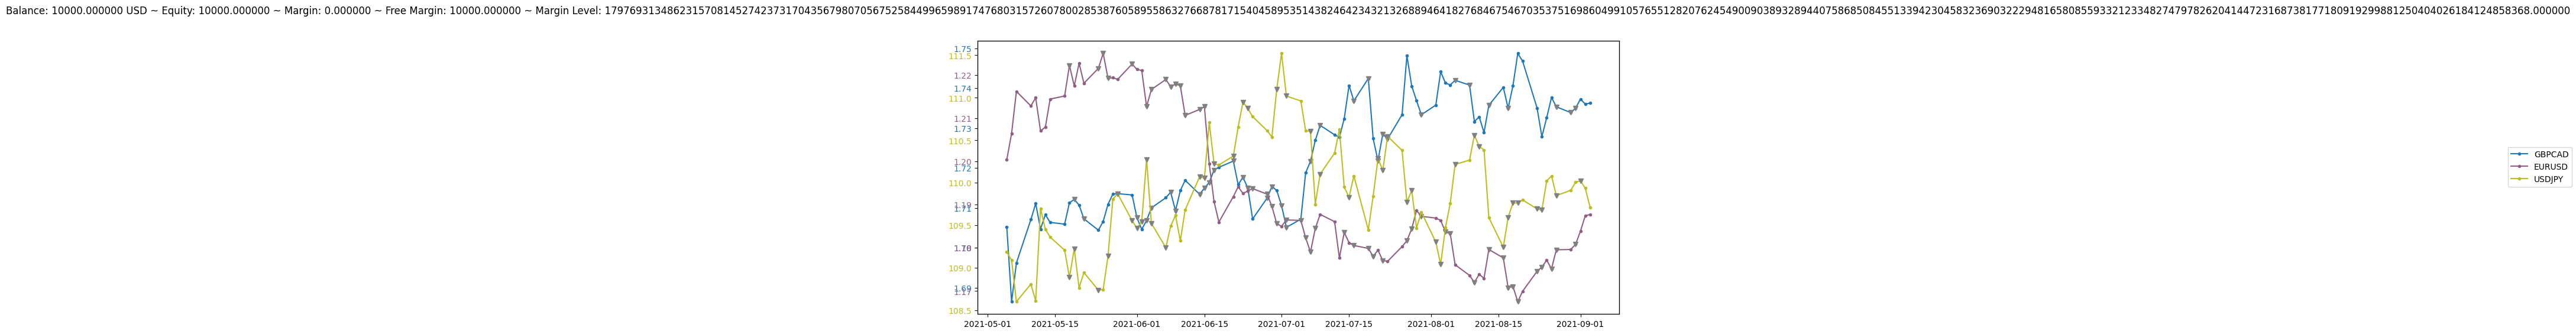

In [16]:
env.render('simple_figure')

In [17]:
# env.render('advanced_figure', time_format="%Y-%m-%d")

## A Complete Example using stable-baselines

In [18]:
import gym
from gym_mtsim import (
    Timeframe, SymbolInfo,
    MtSimulator, OrderType, Order, SymbolNotFound, OrderNotFound,
    MtEnv,
    FOREX_DATA_PATH, STOCKS_DATA_PATH, CRYPTO_DATA_PATH, MIXED_DATA_PATH,
)
from stable_baselines3 import A2C

env = gym.make('forex-hedge-v0')

ModuleNotFoundError: No module named 'stable_baselines3'

In [ ]:
print(sys.float_info.max)

In [17]:
env.action_space

Box(-inf, inf, (12,), float32)

In [18]:
env.observation_space

Dict('balance': Box(-inf, inf, (1,), float32), 'equity': Box(-inf, inf, (1,), float32), 'features': Box(-inf, inf, (10, 6), float32), 'margin': Box(-inf, inf, (1,), float32), 'orders': Box(-inf, inf, (3, 2, 3), float32))

In [19]:
model = A2C('MultiInputPolicy', env, verbose=0)
model.learn(total_timesteps=1000)

observation = env.reset()
while True:
    action, _states = model.predict(observation)
    observation, reward, done, info = env.step(action)
    if done:
        break

env.render('simple_figure')

AssertionError: Continuous action space must have a finite lower and upper bound